### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Task/LabML_5.1/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


___

### Подготовка данных

#### Здесь мы отделяем признаки и цель. Масштабируем только для логистической регрессии.

In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

___

## Задание №1

### Логистическая регрессия

In [4]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

metrics_lr = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr)
}
metrics_lr

{'Accuracy': 0.7532467532467533,
 'Precision': 0.6491228070175439,
 'Recall': 0.6727272727272727,
 'F1': 0.6607142857142857}

### Решающее дерево

In [5]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

metrics_tree = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1": f1_score(y_test, y_pred_tree)
}
metrics_tree

{'Accuracy': 0.7467532467532467,
 'Precision': 0.625,
 'Recall': 0.7272727272727273,
 'F1': 0.6722689075630253}

### Ответ для первого задания

In [6]:
print("Логистическая регрессия:", metrics_lr)
print("Решающее дерево:", metrics_tree)

Логистическая регрессия: {'Accuracy': 0.7532467532467533, 'Precision': 0.6491228070175439, 'Recall': 0.6727272727272727, 'F1': 0.6607142857142857}
Решающее дерево: {'Accuracy': 0.7467532467532467, 'Precision': 0.625, 'Recall': 0.7272727272727273, 'F1': 0.6722689075630253}


___

## Задание 2

### Здесь мы исследуем зависимость выбранной метрики от глубины дерева

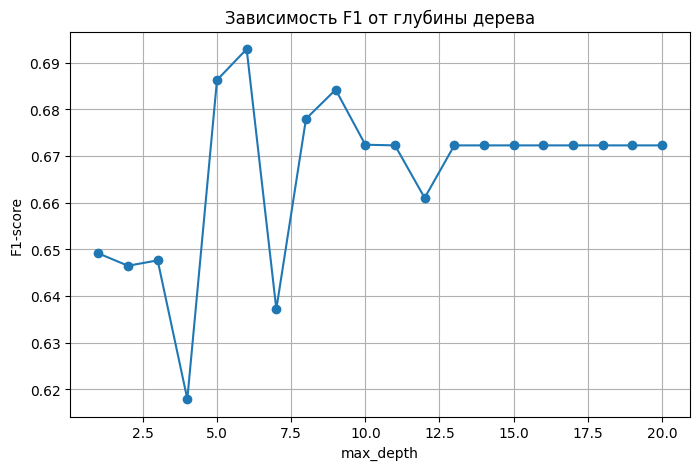

In [7]:
depths = range(1, 21)
f1_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(depths, f1_scores, marker="o")
plt.xlabel("max_depth")
plt.ylabel("F1-score")
plt.title("Зависимость F1 от глубины дерева")
plt.grid()
plt.show()

### Оптимальная глубина - `max(F1)`

In [8]:
best_depth = depths[np.argmax(f1_scores)]
best_depth

6

---

## ЗАДАНИЕ 3  
### Дерево с оптимальной глубиной, важность признаков, ROC/PR кривые

### Обучение финальной модели дерева

In [9]:
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

### Визуализация дерева

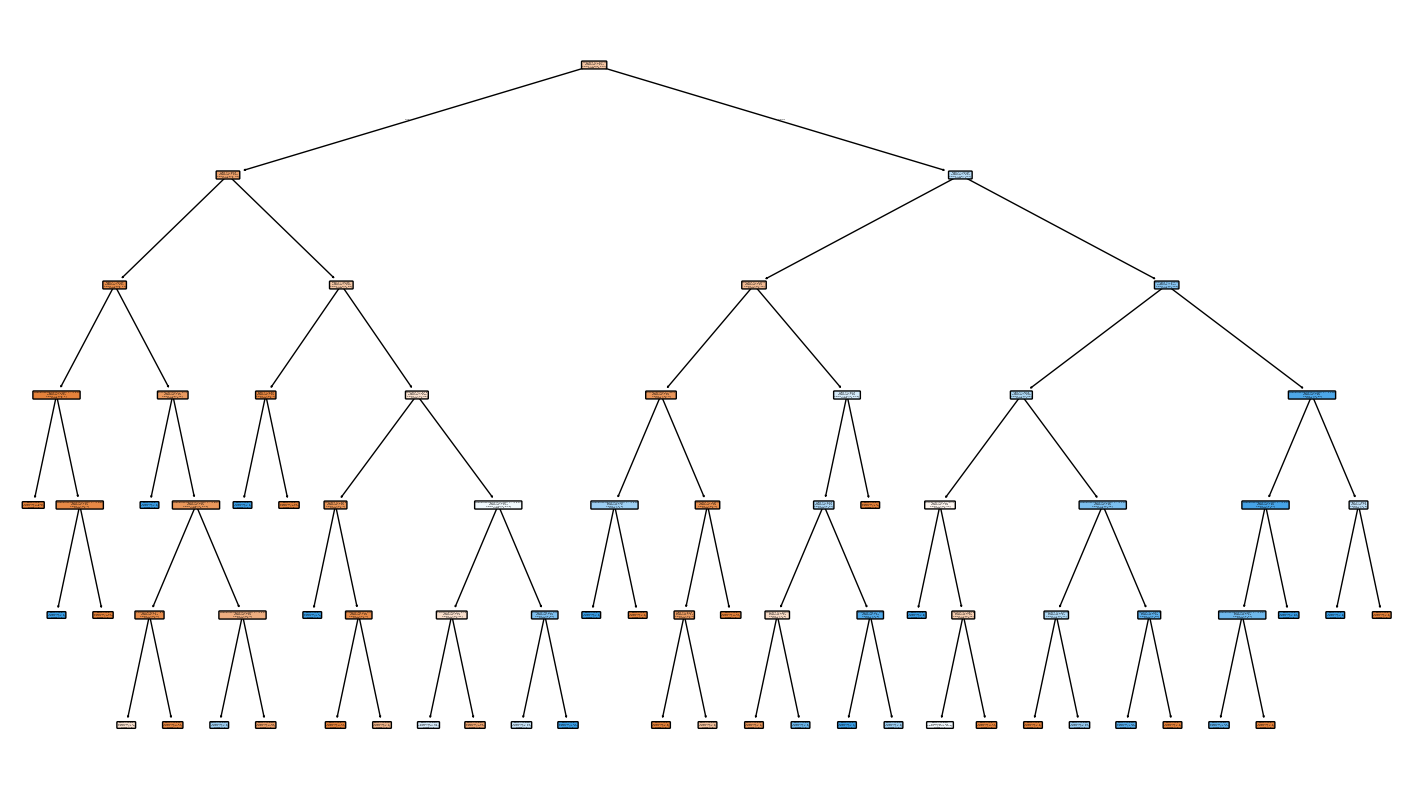

In [10]:
plt.figure(figsize=(18, 10))
plot_tree(final_tree, feature_names=X.columns, class_names=["0","1"],
            filled=True, rounded=True)
plt.show()

### Важность признаков

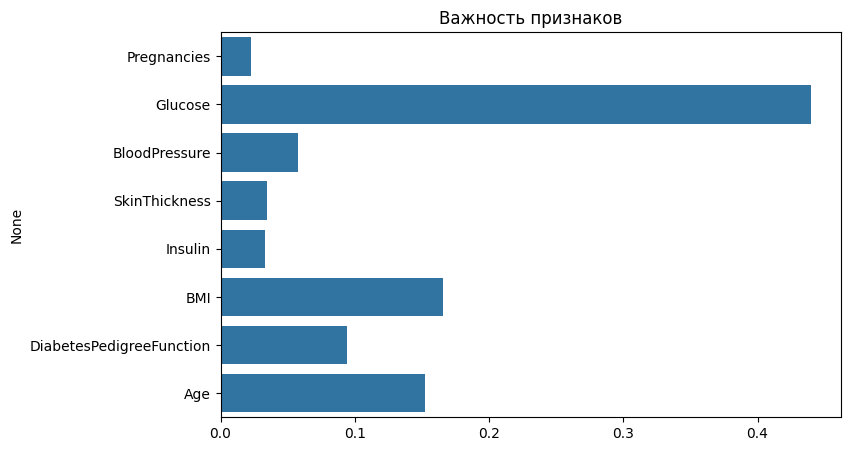

In [11]:
importances = final_tree.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns)
plt.title("Важность признаков")
plt.show()

### ROC-кривая

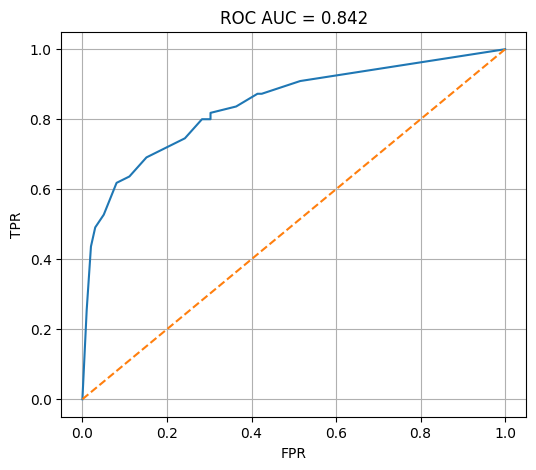

In [12]:
y_prob = final_tree.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"ROC AUC = {roc_auc:.3f}")
plt.grid()
plt.show()

### PR-кривая

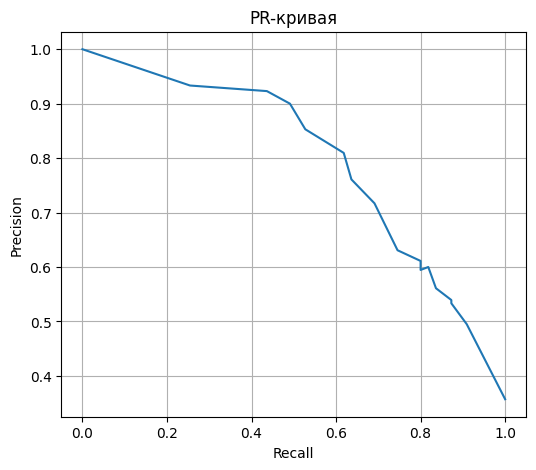

In [13]:
prec, rec, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-кривая")
plt.grid()
plt.show()